In [1]:
import pandas as pd
import pycountry
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import shap

In [2]:
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 999)

In [3]:
data= pd.read_csv('/Users/aadharbaheti/Downloads/owid-covid-data-old.csv')

data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262418,ZWE,Africa,Zimbabwe,2023-03-03,264127.0,NaN,NaN,5668.0,0.0,0.714,16183.718,NaN,NaN,347.292,0.0,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
262419,ZWE,Africa,Zimbabwe,2023-03-04,264127.0,NaN,NaN,5668.0,0.0,0.714,16183.718,NaN,NaN,347.292,0.0,0.044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
262420,ZWE,Africa,Z

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262423 entries, 0 to 262422
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    262423 non-null  object 
 1   continent                                   247696 non-null  object 
 2   location                                    262423 non-null  object 
 3   date                                        262423 non-null  object 
 4   total_cases                                 247875 non-null  float64
 5   new_cases                                   247524 non-null  float64
 6   new_cases_smoothed                          246320 non-null  float64
 7   total_deaths                                228138 non-null  float64
 8   new_deaths                                  228025 non-null  float64
 9   new_deaths_smoothed                         226839 non-null  float64
 

In [5]:
unique_locations = data['location'].unique()
print(unique_locations)

['Afghanistan' 'Africa' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba'
 'Curacao' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Europe' 'European Union' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'German

In [6]:
# Creating a set of valid country names from pycountry
valid_country_names = {country.name for country in pycountry.countries}

#dropping rows with anomalies from the dataset
data = data[data['location'].apply(lambda x: x in valid_country_names)]

In [7]:
unique_locations = data['location'].unique()
print(unique_locations)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guam' 'Guatemala' 'Guernsey'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hong Kong'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iraq' 'Ireland' 'Isle of Man'
 'Israel' 'Italy'

In [8]:
data['date'] = pd.to_datetime(data['date']) 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212834 entries, 0 to 262422
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    212834 non-null  object        
 1   continent                                   212834 non-null  object        
 2   location                                    212834 non-null  object        
 3   date                                        212834 non-null  datetime64[ns]
 4   total_cases                                 204852 non-null  float64       
 5   new_cases                                   204533 non-null  float64       
 6   new_cases_smoothed                          203538 non-null  float64       
 7   total_deaths                                190656 non-null  float64       
 8   new_deaths                                  190380 non-null  float64      

In [10]:
australia_df = data[data['location'] == 'Australia']

In [11]:
australia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 13312 to 14448
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    1137 non-null   object        
 1   continent                                   1137 non-null   object        
 2   location                                    1137 non-null   object        
 3   date                                        1137 non-null   datetime64[ns]
 4   total_cases                                 1137 non-null   float64       
 5   new_cases                                   1130 non-null   float64       
 6   new_cases_smoothed                          1125 non-null   float64       
 7   total_deaths                                1102 non-null   float64       
 8   new_deaths                                  1096 non-null   float64       
 9   new

In [12]:
# Imputing zeros for all null values in the 'new_vaccinations' column
australia_df['new_vaccinations'].fillna(0, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


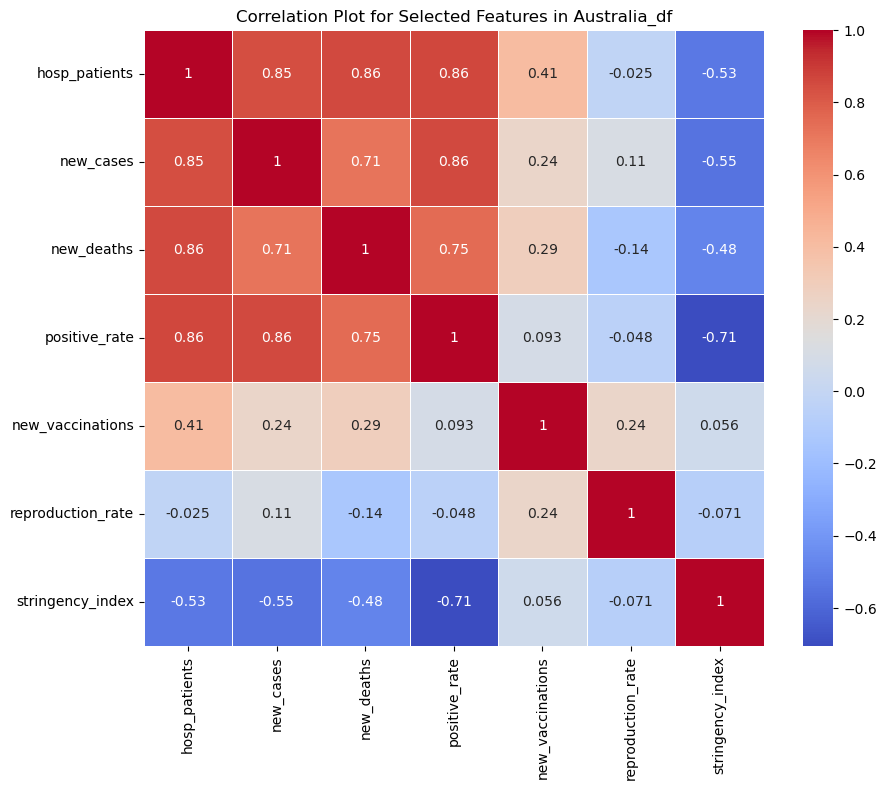

In [13]:
selected_columns = ["hosp_patients", "new_cases", "new_deaths", "positive_rate",'new_vaccinations', "reproduction_rate",'stringency_index']
selected_data = australia_df[selected_columns].dropna()


correlation_matrix = selected_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Plot for Selected Features in Australia_df")
plt.show()


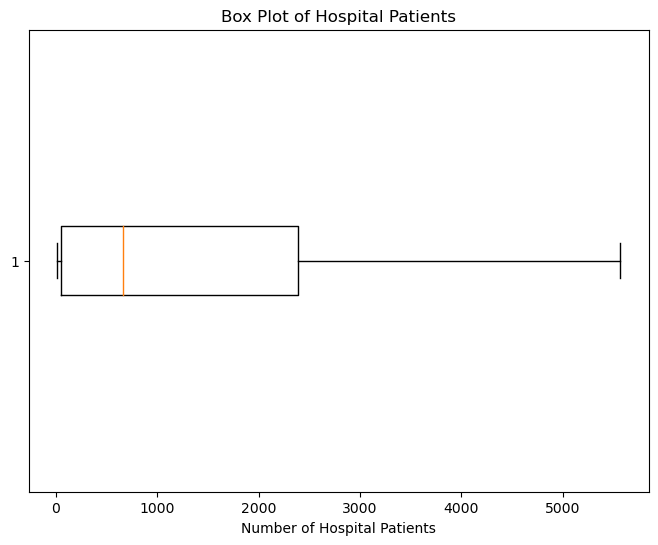

In [14]:
import matplotlib.pyplot as plt

# Create a box plot to check the range of values
plt.figure(figsize=(8, 6))
plt.boxplot(australia_df['hosp_patients'].dropna(), vert=False)
plt.title('Box Plot of Hospital Patients')
plt.xlabel('Number of Hospital Patients')
plt.show()


In [15]:
mean_hosp_patients = australia_df['hosp_patients'].mean()
print("Mean of hospital patients:", mean_hosp_patients)

Mean of hospital patients: 1316.186504217432


In [24]:
##PREDICTIVE MODEL 

relevant_columns = ["new_cases", "new_deaths","stringency_index", 'reproduction_rate',"positive_rate","hosp_patients",'new_vaccinations']
data = australia_df[relevant_columns].dropna()


X = data.drop("hosp_patients", axis=1)
y = data["hosp_patients"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [1,2,3,4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_regressor = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs= -1)
grid_search.fit(X_train_scaled, y_train)


best_params = grid_search.best_params_


best_rf_regressor = grid_search.best_estimator_
best_rf_regressor.fit(X_train_scaled, y_train)


y_pred = best_rf_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 28132.745094274127


In [17]:
print(best_params)

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [18]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

R-squared (R2): 0.9818442649255591


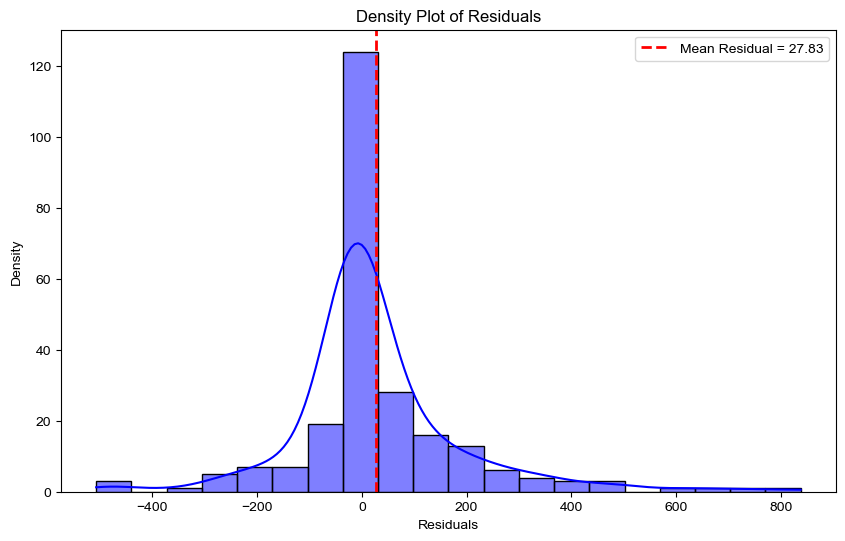

In [19]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')

# Calculate the mean of residuals
mean_residuals = residuals.mean()

# Add a vertical line for the mean of residuals
plt.axvline(mean_residuals, color='red', linestyle='dashed', linewidth=2, label=f'Mean Residual = {mean_residuals:.2f}')

plt.legend()

sns.set_style('whitegrid') 

plt.show()

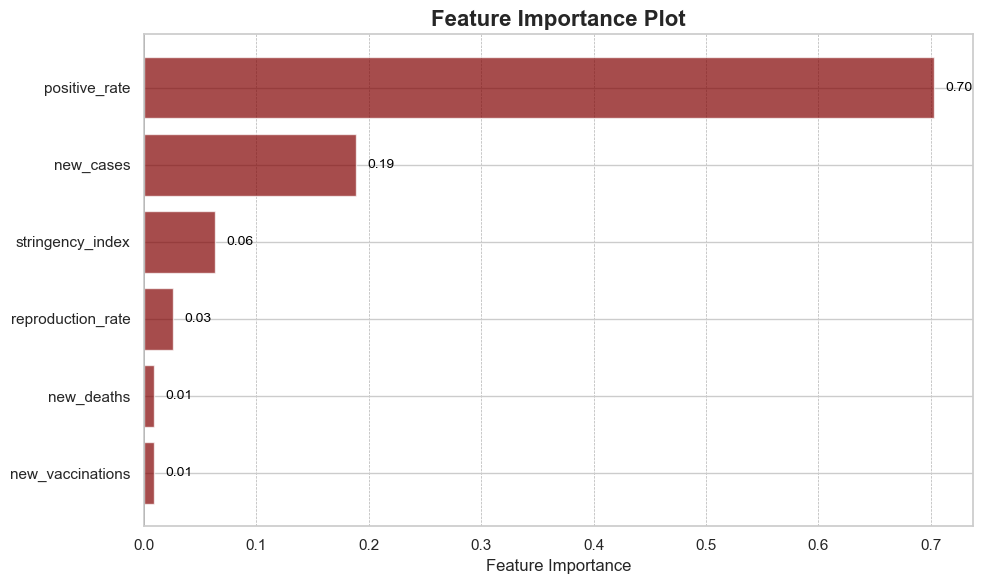

In [20]:
sns.set(style="whitegrid")

feature_importances = best_rf_regressor.feature_importances_
feature_names = X.columns


indices = np.argsort(feature_importances)[::-1]


plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importances[indices], color='maroon', alpha=0.7)
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance Plot", fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  
plt.grid(axis="x", linestyle="--", alpha=0.6, color='gray', linewidth=0.5)


for i, v in enumerate(feature_importances[indices]):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=10, color='black')


plt.axvline(x=0, color='black', linewidth=0.5)

plt.tight_layout()  
plt.show()


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


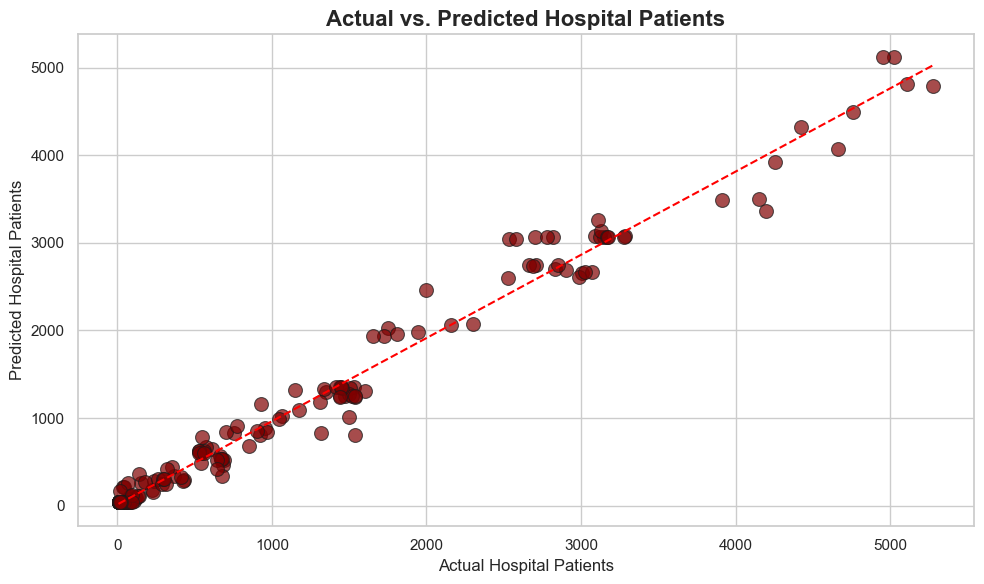

In [21]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.scatterplot(y_test, y_pred, color='maroon', alpha=0.7, edgecolor='k', s=100)
plt.xlabel("Actual Hospital Patients", fontsize=12)
plt.ylabel("Predicted Hospital Patients", fontsize=12)
plt.title("Actual vs. Predicted Hospital Patients", fontsize=16, fontweight='bold')


z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)


sns.lineplot(y_test, p(y_test), color='red', linestyle='--')

plt.tight_layout()  
plt.show()

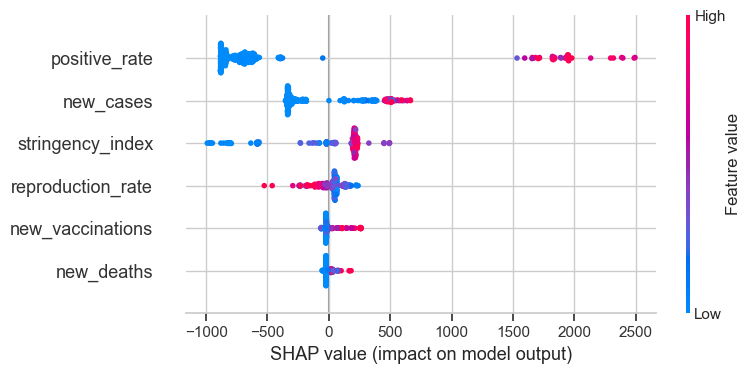

In [22]:
import shap
import numpy as np

explainer = shap.Explainer(best_rf_regressor, X_train_scaled)

num_instances = 500
shap_values = explainer(X_test_scaled[:num_instances])


shap.summary_plot(shap_values, X_test)


Actual Value: 31.0
Predicted Value: 39.34348370057082


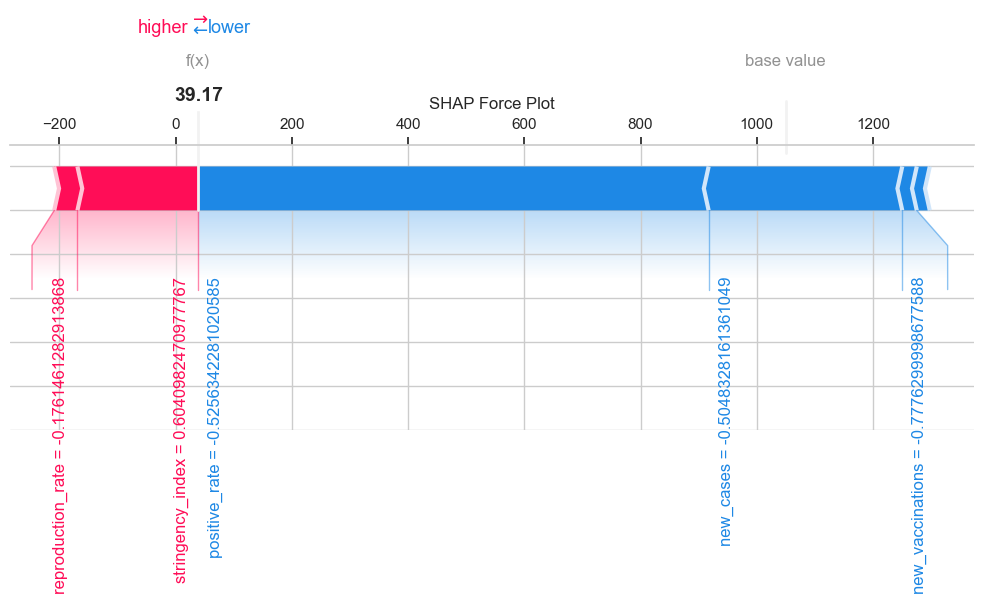

In [23]:
sample_index = 39

actual_value = y_test.iloc[sample_index]

sample_data = X_test_scaled[sample_index]
sample_data = sample_data.reshape(1, -1)

predicted_value = best_rf_regressor.predict(sample_data)[0]


print("Actual Value:", actual_value)
print("Predicted Value:", predicted_value)

explainer = shap.Explainer(best_rf_regressor, X_train_scaled)
shap_values = explainer.shap_values(sample_data)

shap.initjs()  


shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=sample_data,
    feature_names=X.columns,
    matplotlib=True,
    show=False,
    figsize=(10, 6),  
    text_rotation=90,  
)

plt.title("SHAP Force Plot")
plt.tight_layout()  



plt.show()